In [286]:
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras as ks
import numpy as np
from tensorflow.keras import Input
import tensorflow as tf

In [287]:
train = pd.read_csv('../data/split_data/train_stats_21.csv', index_col=0)
test = pd.read_csv('../data/split_data/test_stats_21.csv', index_col=0)
train.head()

,tension_index_int,mode_int,std_int,mean_int,var_int,pnn50_int,RMSSD_int,ivr_int,vpr_int,papr_int,...,y11,y12,y13,y14,y15,y16,y17,y18,y19,y20
0,3.682482e+08,0.252488,0.022584,0.261533,8.635197,0.0,0.022903,1.859564,51.554743,0.565798,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.427940e+08,0.271236,0.022524,0.261781,8.604317,0.0,0.022611,1.859564,47.991166,0.526689,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.427940e+08,0.271236,0.022485,0.261843,8.587072,0.0,0.022985,1.859564,47.991166,0.526689,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.427940e+08,0.271236,0.022731,0.261471,8.693528,0.0,0.023232,1.859564,47.991166,0.526689,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.427940e+08,0.271236,0.023562,0.260169,9.056580,0.0,0.024281,1.859564,47.991166,0.526689,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [288]:

zero_train = train.copy()
zero_test = test.copy()

for column in zero_train.iloc[:, -20:].columns:
    zero_train = zero_train.loc[zero_train[column] == 0]
    zero_test = zero_test.loc[zero_test[column] == 0]

one_train = train.drop(index=zero_train.index)
zero_train = zero_train.sample(one_train.shape[0] // 2)

In [289]:
eq_train = pd.concat((one_train, zero_train), axis=0).sample(2 * zero_train.shape[0])

In [306]:
model = ks.Sequential([
    ks.layers.Input(shape=(21, 1)),
    ks.layers.Conv1D(activation='relu', filters=4, kernel_size=12, padding='same'),
    ks.layers.Conv1D(activation='relu', filters=8, kernel_size=12, padding='same'),
    ks.layers.Conv1D(activation='relu', filters=16, kernel_size=12, padding='same'),
    ks.layers.Conv1D(activation='relu', filters=32, kernel_size=12, padding='same'),
    ks.layers.Flatten(),
    ks.layers.Dense(32, activation='tanh'),
    ks.layers.Dense(21, activation='sigmoid')
])

In [307]:
model.compile(optimizer='adam', loss='mse', metrics='mae')

In [308]:
model.fit(x=eq_train.loc[:, 'r-r-0': 'r-r-20'].values.reshape((-1, 21, 1)), y=eq_train.loc[:, 'y0': 'y20'], batch_size=32,
          epochs=200)

Epoch 1/200
31/31 [==============================] - 0s 4ms/step - loss: 0.2222 - mae: 0.4402
Epoch 2/200
31/31 [==============================] - 0s 4ms/step - loss: 0.1995 - mae: 0.3980
Epoch 3/200
31/31 [==============================] - 0s 4ms/step - loss: 0.1981 - mae: 0.3992
Epoch 4/200
31/31 [==================

In [309]:
pred = model.predict(test.loc[:, 'r-r-0': 'r-r-20'].values.reshape((-1, 21, 1, 1)))
pred

array([[0.0192326 , 0.02005559, 0.03478673, ..., 0.4238742 , 0.39037395,
        0.290497  ],
       [0.02359205, 0.034468  , 0.06154904, ..., 0.46126723, 0.32588696,
        0.22527355],
       [0.05086145, 0.06573501, 0.10333869, ..., 0.9193065 , 0.8604872 ,
        0.6823603 ],
       ...,
       [0.97630703, 0.97113556, 0.86324733, ..., 0.8303997 , 0.5912285 ,
        0.569178  ],
       [0.47608733, 0.30166936, 0.0170632 , ..., 0.98426604, 0.9101948 ,
        0.7103501 ],
       [0.02830684, 0.02122173, 0.00779292, ..., 0.95213795, 0.5823259 ,
        0.22981629]], dtype=float32)

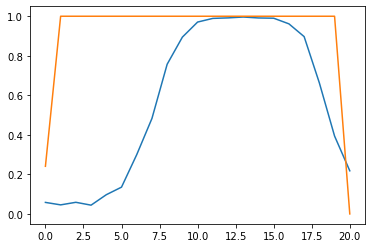

In [318]:
PART = 5
plt.plot(np.arange(0, 21), pred[PART])
plt.plot(np.arange(0, 21),test.iloc[PART, -22: -1])